<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction:-Identify-Customer-Segments" data-toc-modified-id="Introduction:-Identify-Customer-Segments-1">Introduction: Identify Customer Segments</a></span></li><li><span><a href="#Part-1:-Importing-the-Libraries" data-toc-modified-id="Part-1:-Importing-the-Libraries-2">Part 1: Importing the Libraries</a></span></li><li><span><a href="#Part-2:-Loading-the-Datasets" data-toc-modified-id="Part-2:-Loading-the-Datasets-3">Part 2: Loading the Datasets</a></span><ul class="toc-item"><li><span><a href="#2.1.-Exploring-the-Datasets" data-toc-modified-id="2.1.-Exploring-the-Datasets-3.1">2.1. Exploring the Datasets</a></span></li></ul></li><li><span><a href="#Part-3:-Preprocessing" data-toc-modified-id="Part-3:-Preprocessing-4">Part 3: Preprocessing</a></span><ul class="toc-item"><li><span><a href="#3.1.-Converting-Missing-Value-Codes-to-NaNs" data-toc-modified-id="3.1.-Converting-Missing-Value-Codes-to-NaNs-4.1">3.1. Converting Missing Value Codes to NaNs</a></span></li><li><span><a href="#3.2.-Assessing-Missing-Data-in-Each-Column" data-toc-modified-id="3.2.-Assessing-Missing-Data-in-Each-Column-4.2">3.2. Assessing Missing Data in Each Column</a></span></li><li><span><a href="#3.3.-Assessing-Missing-Data-in-Each-Row" data-toc-modified-id="3.3.-Assessing-Missing-Data-in-Each-Row-4.3">3.3. Assessing Missing Data in Each Row</a></span></li></ul></li><li><span><a href="#Part-4:-Selecting-and-Re-Encoding-the-Features" data-toc-modified-id="Part-4:-Selecting-and-Re-Encoding-the-Features-5">Part 4: Selecting and Re-Encoding the Features</a></span></li></ul></div>

# Introduction: Identify Customer Segments

In this project, I will apply unsupervised learning techniques and algorithms to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The dataset I will be using for this project has been provided by [Udacity](https://www.udacity.com/)'s partners at [Bertelsmann Arvato Analytics](https://www.bertelsmann.com/), and represents a real-life data science task.

# Part 1: Importing the Libraries

In [80]:
# Linear algebra and matrix manipulation
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Part 2: Loading the Datasets

There are four files associated with this project (not including this Jupyter Notebook):

* `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
* `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
* `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns.
* `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.

Each row of the demographics files represents a single person, but also includes information outside of individuals, including about their household, building, and neighborhood. I will use this information to cluster the general population into groups with similar demographic properties. Then, I will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core database. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, I will load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note that for all of the `.csv` data files in this project, they are semicolon (`;`) delimited, so I will need an additional argument in my `read_csv()` call to read in the data properly. Also, if you are going to run this project on your own system, note that the main dataset might take a while to load completely, given its rather big size.

In [81]:
# General demographics data
azdias = pd.read_csv("Udacity_AZDIAS_Subset.csv", sep=";")

# Feature summary file
feature_info = pd.read_csv("AZDIAS_Feature_Summary.csv", sep=";")

## 2.1. Exploring the Datasets

In [82]:
# Check the structure of the dataset
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [83]:
azdias.tail()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
891216,-1,3,2,5.0,1,4,2,5,4,4,...,3.0,2.0,0.0,0.0,1.0,2.0,3.0,NaN,NaN,NaN
891217,-1,2,1,4.0,3,3,3,2,2,3,...,1.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,6.0,5.0
891218,-1,2,2,4.0,2,4,2,5,4,3,...,4.0,2.0,0.0,0.0,1.0,3.0,4.0,2.0,2.0,3.0
891219,-1,1,1,3.0,1,5,3,5,5,5,...,1.0,4.0,3.0,1.0,5.0,1.0,1.0,4.0,7.0,5.0
891220,-1,4,1,1.0,4,2,5,2,1,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,4.0,5.0


In [84]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [85]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [86]:
feature_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [87]:
feature_info.tail()

,attribute,information_level,type,missing_or_unknown
80,PLZ8_HHZ,macrocell_plz8,ordinal,[-1]
81,PLZ8_GBZ,macrocell_plz8,ordinal,[-1]
82,ARBEIT,community,ordinal,"[-1,9]"
83,ORTSGR_KLS9,community,ordinal,"[-1,0]"
84,RELAT_AB,community,ordinal,"[-1,9]"


In [88]:
feature_info.describe()

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,SEMIO_KRIT,person,ordinal,[-1]
freq,1,43,49,26


In [89]:
feature_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


# Part 3: Preprocessing

The feature summary file contains a summary of properties for each demographics data column. I will use this file to make data-cleaning decisions during this stage of the project. First of all, I will assess the demographics data in terms of missing data.

## 3.1. Converting Missing Value Codes to NaNs

The fourth column of the feature attributes summary (loaded above as `feature_info` documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1, 0]`, this will get read in as a string object. So, I need to do a little bit of parsing to make use of it to identify and clean the data. I want to see how much data takes on a "missing" or "unknown" code, and how much data is naturally missing, as a point of interest.

In [90]:
# Double sum to add them all
print("Number of missing values: {}".format(azdias.isnull().sum().sum()))

Number of missing values: 4896838


Go ahead and take a look at the `feature_info` DataFrame. You will see that it contains values like `X` or `XX` or even empty values for the `missing_or_unknown` column. We need to work on them.

In [91]:
feature_info[57:60] # Take a look at the missing_or_unknown column!

,attribute,information_level,type,missing_or_unknown
57,CAMEO_DEUG_2015,microcell_rr4,categorical,"[-1,X]"
58,CAMEO_DEU_2015,microcell_rr4,categorical,[XX]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]"


In [92]:
for row in range(len(feature_info)):
    m_o_u = feature_info.iloc[row]["missing_or_unknown"]
    m_o_u = m_o_u.strip("[").strip("]").split(sep=",")
    m_o_u = [int(self) if (self!="" and self!="X" and self!="XX") else self for self in m_o_u]
    
    # Modifying azdias as well. According to the changes we made in feature_info
    if m_o_u != [""]:
        azdias = azdias.replace({feature_info.iloc[row]["attribute"]: m_o_u}, np.nan)

In [93]:
# Sum them all up again to check
print("Number of missing values: {}".format(azdias.isnull().sum().sum()))

Number of missing values: 8373929


Looks just fine.

## 3.2. Assessing Missing Data in Each Column

There are a few columns that are outliers in terms of the proportion of values that are missing in them. I am going to use matplotlib's `hist()` function to visualize the distribution of missing value counts to find these columns.

In [94]:
# Finding the percentage of the missing data in each column
columns_missing_percentage = 100*(azdias.isnull().sum()/len(azdias))

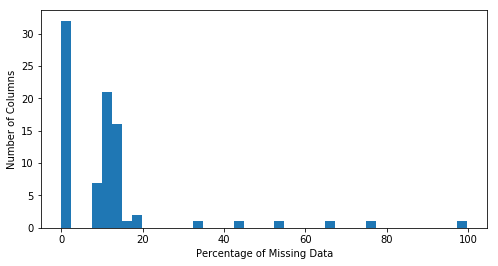

In [95]:
# Plot it out to see it better
plt.figure(figsize=(8,4))
plt.hist(columns_missing_percentage, bins=40)
plt.xlabel("Percentage of Missing Data")
plt.ylabel("Number of Columns")
plt.show()

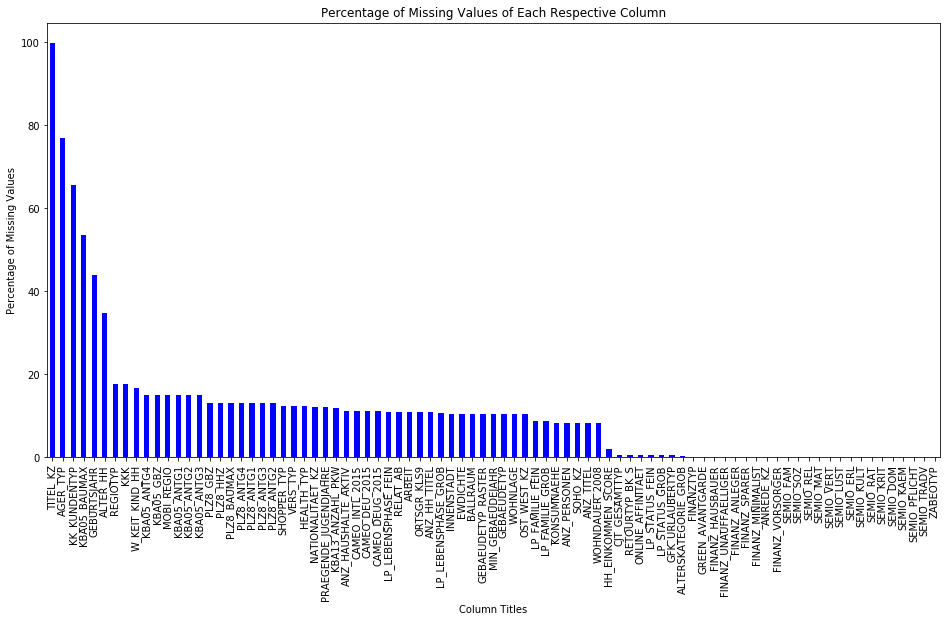

In [50]:
# Plot the percentage of missing values for each column
columns_sorted = columns_missing_percentage.sort_values(ascending=False)
plt.figure(figsize=(16,8))
plt.xlabel("Column Titles")
plt.ylabel("Percentage of Missing Values")
plt.title("Percentage of Missing Values of Each Respective Column")
columns_sorted.plot.bar(color="blue");

`15%` looks like a reasonable threshold for our purpose.

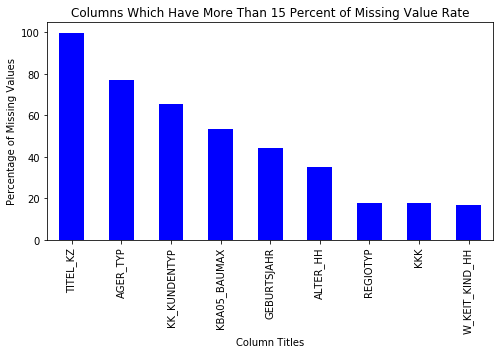

In [24]:
# Select the columns which have more than 15 percent of missing value rate
columns_missing_percentage_15 = columns_missing_percentage[columns_missing_percentage>15]
columns_missing_percentage_15_list = columns_missing_percentage_15.index.tolist()

# Plot it to see it better
plt.figure(figsize=(8,4))
plt.xlabel("Column Titles")
plt.ylabel("Percentage of Missing Values")
plt.title("Columns Which Have More Than 15 Percent of Missing Value Rate")
plt.grid()
columns_missing_percentage_15.sort_values(ascending=False).plot.bar(color="blue");

In [25]:
# Remove the outlier columns from the dataset
azdias = azdias.drop(columns_missing_percentage_15_list, axis=1)

# Communicate the step above
str1 = ", ".join(columns_missing_percentage_15_list).strip("[").strip("]")
print("Columns that had more that 15 percent of missing data "
      "and therefore dropped are: {}".format(str1)+".")

Columns that had more that 15 percent of missing data and therefore dropped are: AGER_TYP, GEBURTSJAHR, TITEL_KZ, ALTER_HH, KK_KUNDENTYP, W_KEIT_KIND_HH, KBA05_BAUMAX, KKK, REGIOTYP.


So it seems like we got rid of 6 columns, namely `AGER_TYP`, `GEBURTSJAHR`, `TITEL_KZ`, `ALTER_HH`, `KK_KUNDENTYP`, `W_KEIT_KIND_HH`, `KBA05_BAUMAX`, `KKK`, `REGIOTYP`. Before this step, we had 85 columns. Now, let's check whether everything is okay and that we indeed got rid of those 9 columns.

In [26]:
azdias.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1,2.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


![title](images/meme1.jpg)

## 3.3. Assessing Missing Data in Each Row

Now, I will perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, we should be able to see some groups of points that have a very different numbers of missing values. I will divide the data into two subsets; one for the data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. I will select at least five of these columns and compare the distribution of values. 

Depending on what we observe in our comparison, this will have implications on how we approach our conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special.

In [27]:
# Finding the number of missing data in each row
rows_missing_count = azdias.isnull().sum(axis=1)

In [29]:
rows_missing_count.describe()

count    891221.00000
mean          5.12913
std          12.36693
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max          46.00000
dtype: float64

We can see above that our dataset is _generally_ doing okay. We have a low mean and relatively low standard deviation. But considering that after we eliminated those 9 columns in the step `3.2.`, 46 is a pretty high number of missing values for a given row, and we have to work on that.

In [61]:
# Percentage of rows with no missing data
n_rows_wout_missing = rows_missing_count[rows_missing_count==0].count()
n_rows_wout_missing_percentage = 100*n_rows_wout_missing/azdias.shape[0]
print("The number of rows with no missing data is", n_rows_wout_missing)
print("Percentage of rows with no missing data over all rows is {:.2f}%".format(n_rows_wout_missing_percentage))

The number of rows with no missing data is 668241
Percentage of rows with no missing data over all rows is 74.98%


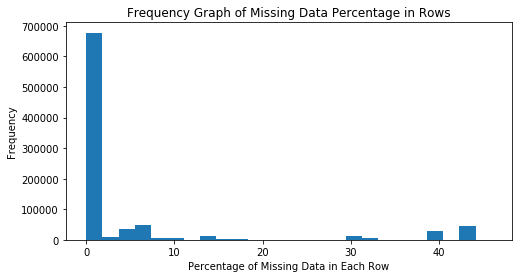

In [43]:
# Visualization of the percentage of data missing in rows
plt.figure(figsize=(8,4))
plt.hist(rows_missing_count, bins=25)
plt.xlabel("Percentage of Missing Data in Each Row")
plt.ylabel("Frequency")
plt.title("Frequency Graph of Missing Data Percentage in Rows")
plt.show()

In [66]:
# Divide the data into two subsets based on the number of missing values in each row
azdias_under_6 = azdias[azdias.isnull().sum(axis=1) <= 6]
azdias_over_6 = azdias[azdias.isnull().sum(axis=1) > 6]

In [73]:
# Compare the distribution of the values for at least five columns 
# where there are no or few missing values between the two datasets.
columns_wout_missing_values = columns_missing_percentage[columns_missing_percentage==0].index.tolist()
columns_selected = columns_wout_missing_values[:5]
columns_selected

['ANREDE_KZ',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER']

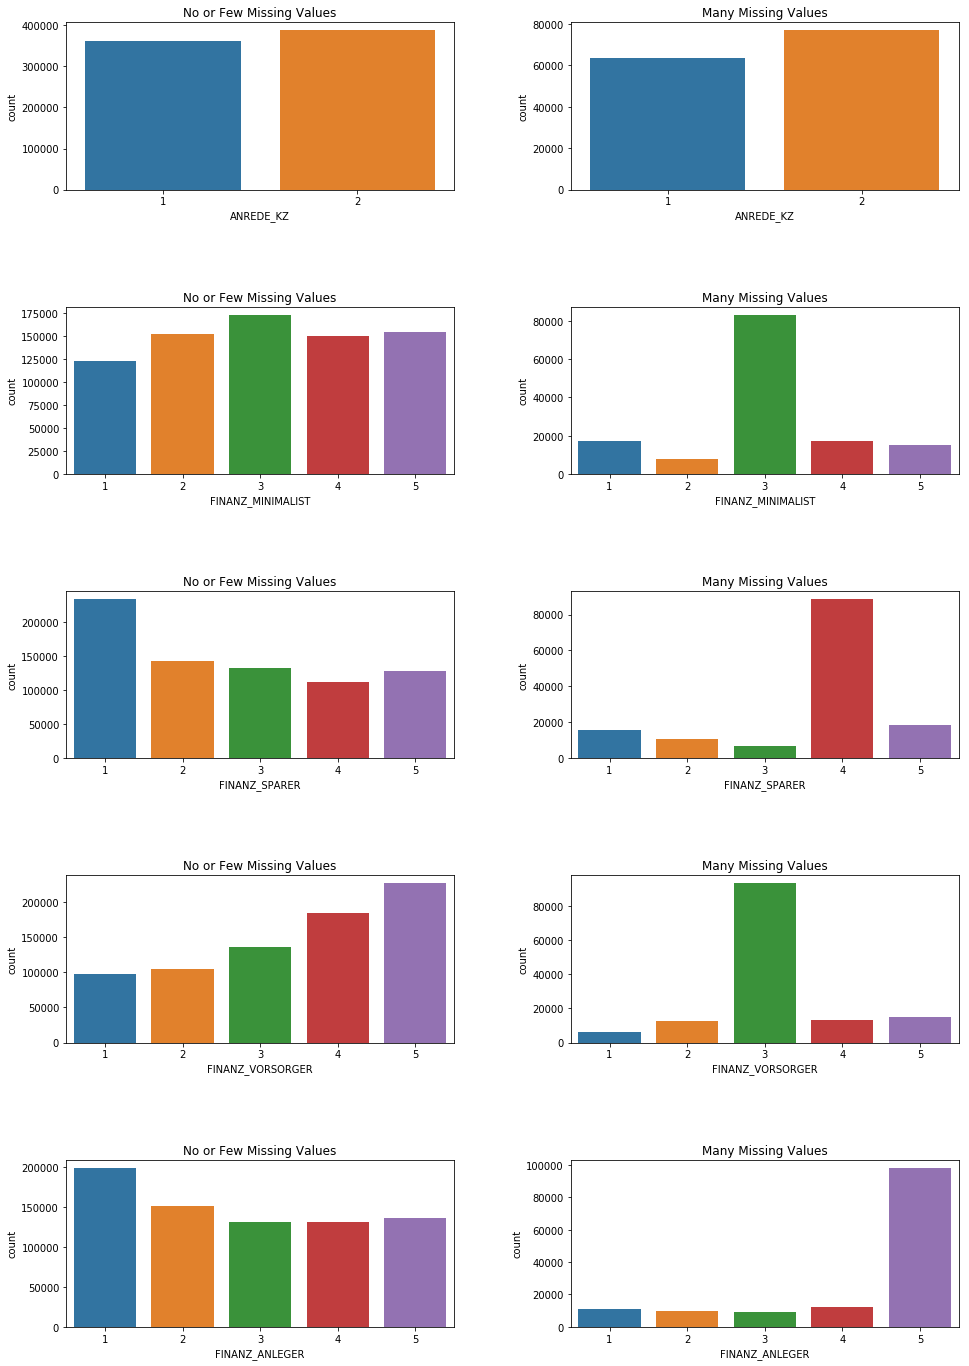

In [77]:
# Visualizing those five columns
figure, axs = plt.subplots(nrows=len(columns_selected), ncols=2, figsize=(16,24))
figure.subplots_adjust(hspace=0.7, wspace=0.3)
for col in range(len(columns_selected)):
    sns.countplot(azdias_under_6[columns_selected[col]], ax=axs[col][0])
    axs[col][0].set_title("No or Few Missing Values")
    
    sns.countplot(azdias_over_6[columns_selected[col]], ax=axs[col][1])
    axs[col][1].set_title("Many Missing Values")

# Part 4: Selecting and Re-Encoding the Features

Checking for missing data isn't the only way in which we can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, we need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, I will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether I will keep, drop, or re-encode each. Then, in the last part, I will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. So, let's begin!